In [2]:
import numpy as np 
import pandas as pd
# import pyspark
# import findspark

pd.set_option('display.max_columns', None)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# importing data set
dataset = pd.read_csv('Dataset/Kaggle_Airbnb_Open_Data.csv')

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_49742/2695541328.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Dataset/Kaggle_Airbnb_Open_Data.csv')


Data Exploraton

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
# Looking at the columns of the dataset
dataset.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
# Rough view of the aggregation on the dataset
dataset.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [7]:
# view the data types of the columns
dataset.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [8]:
# finding the columns with null values
dataset.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [9]:
dataset.count() 

id                                102599
NAME                              102349
host id                           102599
host_identity_verified            102310
host name                         102193
neighbourhood group               102570
neighbourhood                     102583
lat                               102591
long                              102591
country                           102067
country code                      102468
instant_bookable                  102494
cancellation_policy               102523
room type                         102599
Construction year                 102385
price                             102352
service fee                       102326
minimum nights                    102190
number of reviews                 102416
last review                        86706
reviews per month                  86720
review rate number                102273
calculated host listings count    102280
availability 365                  102151
house_rules     

Dropping columns

In [10]:
# creating a new dataset with the fields you want

Airbnb_data_subset = dataset [['id', 'NAME', 'host id', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365']]

In [11]:
#Number of different neighbourhood_group
Airbnb_data_subset.shape

(102599, 22)

In [12]:
# counting the number of times a value occures
Airbnb_data_subset['neighbourhood'].value_counts()['Bedford-Stuyvesant']

7937

In [13]:
# drop duplicate values
Airbnb_data_subset.drop_duplicates()['neighbourhood']

0                 Kensington
1                    Midtown
2                     Harlem
3               Clinton Hill
4                East Harlem
                 ...        
102053              Flatbush
102054              Bushwick
102055    Bedford-Stuyvesant
102056                Harlem
102057                Harlem
Name: neighbourhood, Length: 102058, dtype: object

In [14]:
# isnull( ): function to check whether the value is null or not
# sum() method returns the sum of the values
Airbnb_data_subset.isnull().sum()

id                                    0
NAME                                250
host id                               0
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [15]:
# df.loc[df['column_name'].isin(some_values)]
Airbnb_data_subset.loc[Airbnb_data_subset['neighbourhood group'] == 'Manhattan'].head(5)

,id,NAME,host id,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
1,1002102,Skylit Midtown Castle,52335172823,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
8,1005754,Large Furnished Room Near B'way,79384379533,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,"$1,018",$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0


In [16]:
# filter the neighbourhood with null values
Airbnb_data_subset[Airbnb_data_subset.neighbourhood .isnull()]

,id,NAME,host id,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
517,1286875,"""The Oasis"" on Bedford Williamsburg",30603782652,Lucas,Brooklyn,NaN,40.71580,-73.95803,NaN,NaN,NaN,NaN,Entire home/apt,NaN,$130,6.0,1.0,1/1/2016,0.02,5.0,1.0,266.0
547,1303444,STYLISH EAST VILLAGE FLAT,6825076306,Arnold,Manhattan,NaN,40.73089,-73.98195,United States,US,True,strict,Entire home/apt,$749,$150,30.0,25.0,4/30/2018,0.26,4.0,1.0,67.0
553,1306758,Comfortable. Spacious. Private Room.,45534966158,Ned,Manhattan,NaN,40.71300,-73.99752,United States,US,True,flexible,Private room,$613,$123,NaN,172.0,7/2/2019,1.84,5.0,2.0,63.0
575,1318909,"2 Bed, 2 Bath Apartment on Central Park West",86633710982,Arthur,Manhattan,NaN,40.79816,-73.96190,United States,US,True,strict,Entire home/apt,$892,$178,2.0,45.0,4/22/2019,0.47,4.0,3.0,4.0
589,1326641,CBG Helps Haiti Rm #3,33952991254,Jacob,Brooklyn,NaN,40.68012,-73.97847,United States,US,False,strict,Private room,$793,$159,2.0,23.0,9/15/2018,0.24,1.0,6.0,NaN
613,1339896,Wonderfully inviting East Village,84560895335,Carter,Manhattan,NaN,40.72709,-73.98274,United States,US,True,moderate,Private room,$486,$97,1.0,109.0,10/2/2015,1.15,2.0,1.0,116.0
624,1345971,Stylish Studio with exclusive Terrace,21547822804,Cole,Manhattan,NaN,40.75348,-73.97065,United States,US,False,moderate,Entire home/apt,$417,$83,30.0,136.0,6/19/2019,1.45,4.0,1.0,272.0
633,1350942,Lower East Side/Chinatown 1 Bedroom,58408401042,Higgins,Manhattan,NaN,40.71693,-73.98948,United States,US,False,flexible,Entire home/apt,"$1,148",$230,5.0,8.0,5/18/2018,0.11,3.0,1.0,42.0
643,1356465,2BR Apt - 20min to Soho,21192497123,Barrett,Brooklyn,NaN,40.68016,-73.94878,United States,US,False,moderate,Entire home/apt,$938,$188,3.0,5.0,7/9/2017,0.05,2.0,1.0,408.0
670,1371377,Loft Suite @ The Box House Hotel,75427375884,Gray,Brooklyn,NaN,40.73641,-73.95330,United States,US,False,strict,Entire home/apt,$104,$21,3.0,24.0,11/6/2018,0.32,4.0,28.0,419.0


In [17]:
# the .value_counts() method in Pandas does not include null values by default

num_different_neighbourhoods = len(Airbnb_data_subset['neighbourhood'].value_counts())
print(num_different_neighbourhoods)

# If you want to include the count of null values in the "neighbourhood" column, you can use the "dropna" parameter and set it to "False". 

neighbourhood_counts = Airbnb_data_subset['neighbourhood'].value_counts(dropna=False)


224


In [18]:
Airbnb_data_subset['neighbourhood'].value_counts()

Bedford-Stuyvesant        7937
Williamsburg              7775
Harlem                    5466
Bushwick                  4982
Hell's Kitchen            3965
                          ... 
Rossville                    3
Lighthouse Hill              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

In [19]:
# Get the number of different neighbourhoods 
num_different_neighbourhoods = len(Airbnb_data_subset['neighbourhood'].unique())
print(num_different_neighbourhoods)

225


In [20]:
# Filter the number of listing per neighbourhood groupby neighbourhood group

#  df.groupby(["Group", "Size"]).size()
# Airbnb_data_subset.groupby(['neighbourhood group','neighbourhood']).size().to_string()
# Airbnb_data_subset.groupby(['neighbourhood group','neighbourhood']).size()

print(Airbnb_data_subset.groupby(['neighbourhood group','neighbourhood']).size().to_string())


neighbourhood group  neighbourhood             
Bronx                Allerton                        97
                     Baychester                      29
                     Belmont                         45
                     Bronxdale                       48
                     Castle Hill                     22
                     City Island                     41
                     Claremont Village               59
                     Clason Point                    50
                     Co-op City                       5
                     Concourse                      123
                     Concourse Village               76
                     East Morrisania                 21
                     Eastchester                     28
                     Edenwald                        35
                     Fieldston                       25
                     Fordham                        153
                     Highbridge                      67


---
1.What can we learn about different hosts and areas?

a.area with the highest number of airbnbs

b.price of the listing avg,range,mean,median ...etc

c.number of reviews per host/listing ratio for each area  (total number of listings / total number of properties)
d.

In [21]:
#Number of AirBnb in different neighbourhood_group
Airbnb_data_subset['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

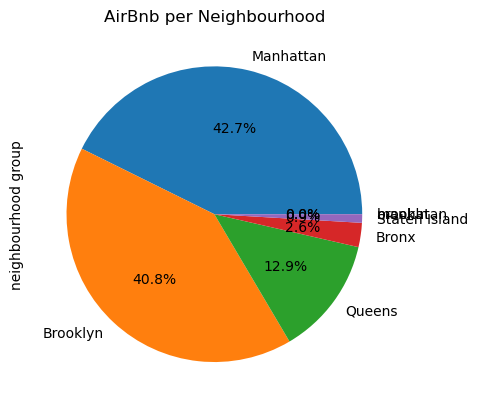

In [22]:
# ploting#Pie chart of different neighbourhood_group by count
neighbourhood_piechart = Airbnb_data_subset['neighbourhood group'].value_counts()
plotPie = neighbourhood_piechart.plot.pie(y='count', autopct='%1.1f%%', legend = False, title='AirBnb per Neighbourhood')

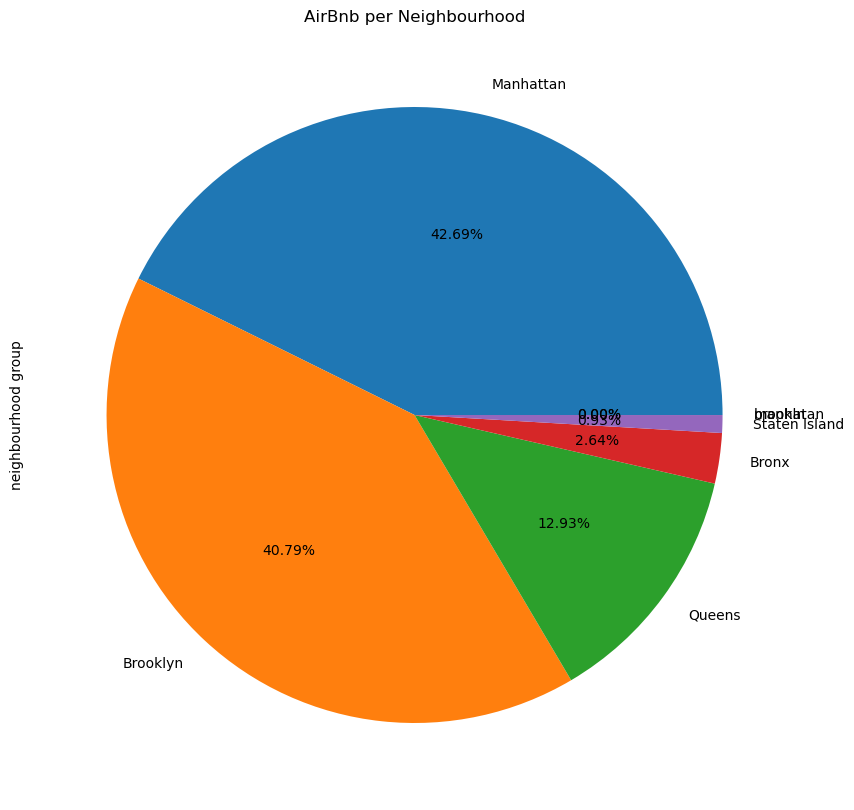

In [23]:
# ploting
#Pie chart of different neighbourhood_group by count
neighbourhood_piechart = Airbnb_data_subset['neighbourhood group'].value_counts()
plotPie = neighbourhood_piechart.plot.pie(y='count',autopct='%1.2f%%',figsize = (20,10 ), title='AirBnb per Neighbourhood')

---- 
Data Cleaning

Correcting the data type of price and service price from str to float

In [24]:
# assigning dataset dataframe to 'df'
# in the price column remove $ and , then convert datatype to float

df = dataset

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype('float')

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_49742/4144540107.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [25]:
df['service fee'] = df['service fee'].str.replace('$', '')
df['service fee'] = df['service fee'].str.replace(',', '')
df['service fee'] = df['service fee'].astype('float')

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_49742/958221323.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace('$', '')


In [26]:
df.loc[df['neighbourhood group'] == 'Manhattan'].head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,1018.0,204.0,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN


In [27]:
df_listing = df.groupby(['neighbourhood group','room type'])['price'].max().head(20)
print("Top neighbourhood groups and room types with highest maximum price:\n", df_listing, "\n")


Top neighbourhood groups and room types with highest maximum price:
 neighbourhood group  room type      
Bronx                Entire home/apt    1200.0
                     Private room       1200.0
                     Shared room        1171.0
Brooklyn             Entire home/apt    1200.0
                     Hotel room         1082.0
                     Private room       1200.0
                     Shared room        1197.0
Manhattan            Entire home/apt    1200.0
                     Hotel room         1193.0
                     Private room       1200.0
                     Shared room        1199.0
Queens               Entire home/apt    1200.0
                     Hotel room          912.0
                     Private room       1200.0
                     Shared room        1198.0
Staten Island        Entire home/apt    1196.0
                     Private room       1200.0
                     Shared room        1162.0
brookln              Private room        580.0
m